# Loan Prediction

### Probelm
- A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

### DATA
- Variable Descriptions:

| S.No. | Variable  | Description    | 
|---:|:-------------|:-----------|
| 1 | Loan_ID | Unique Loan ID       | 
| 2 | Gender | Male/ Female    |
| 3 | Married  | Applicant married (Y/N)       | 
| 4 | Dependents  | Number of dependents    |
| 5 |Education  | Applicant Education (Graduate/ Under Graduate)
       | 
| 6 | Self_Employed  | Self employed (Y/N)
    |
| 7 | ApplicantIncome  | Applicant income
       | 
| 8 | CoapplicantIncome  | Coapplicant income    |
| 9 | LoanAmount  | Loan amount in thousands       | 
| 10| Loan_Amount_Term  | Term of loan in months    |
| 11| Credit_History  | credit history meets guidelines       | 
| 12| Property_Area  | Urban/ Semi Urban/ Rural    |
| 13| Loan_Status  | 	Loan approved (Y/N)       | 


In [1]:
# Importing Library
import pandas as pd
import numpy as np

In [2]:
# Reading the training dataset in a dataframe using Pandas
train = pd.read_csv("train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [3]:
print("Shape of train data :- ", train.shape)
print("Shape of test data :- ", test.shape)

Shape of train data :-  (614, 13)
Shape of test data :-  (367, 12)


In [4]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
train['Type']='Train' 
test['Type']='Test'
df = pd.concat([train,test], axis=0)

In [5]:
# First 10 Rows of training Dataset

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Train
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Train
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Train
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Train
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,Train
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Train


In [6]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

In [7]:
# Understanding the various features (columns) of the dataset.
# Summary of numerical variables for training data set

df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
# Get the unique values and their frequency of variable Property_Area

df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

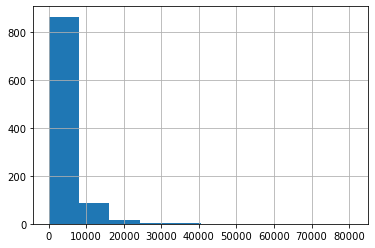

In [9]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()

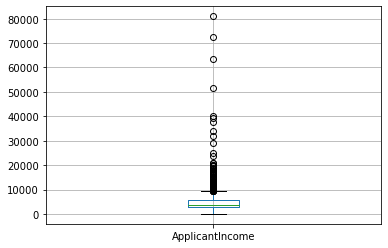

In [10]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

**The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.**

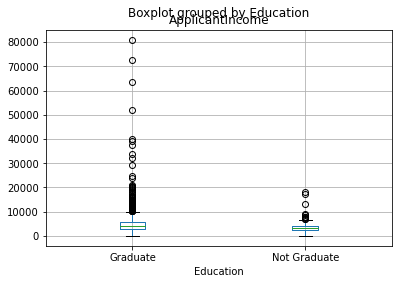

In [11]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

**We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers**

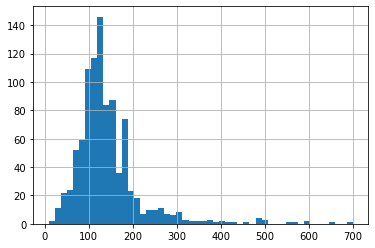

In [12]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

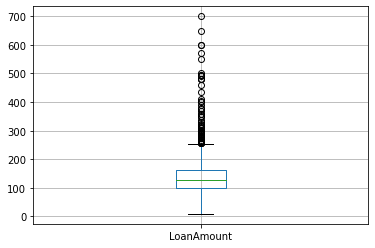

In [13]:

# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

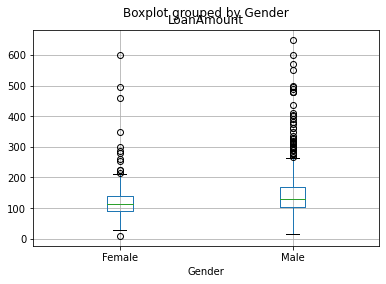

In [14]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

**LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.**

In [15]:
# Loan approval rates in absolute numbers
# loan_approval = df[df['Loan_Status']=='Y']------You can also find like below
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


**422 number of loans were approved.**


In [16]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Outliers of LoanAmount and Applicant Income

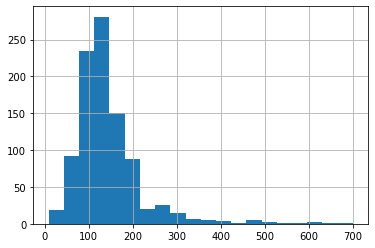

In [17]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

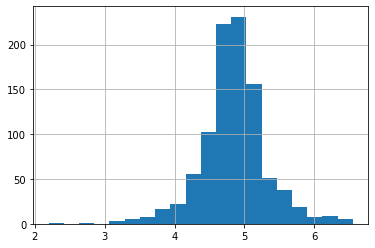

In [18]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

## Missing Imputation
sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [19]:
# Check the missing data
df.isnull().sum()



Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Type                   0
TotalIncome            0
LoanAmount_log        27
dtype: int64

In [20]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Type                  object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Type               981 non-null    object 
 14  TotalIncome        981 non-null    float64
 15  LoanAmount_log     954 non-null    float64
dtypes: float64(6), int64(1), o

In [22]:

#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [23]:
#Imputing Missing values with mean for continuous variable
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

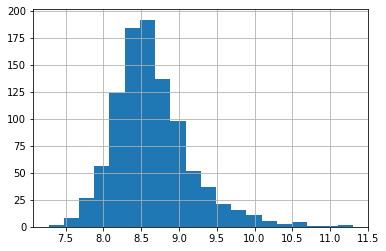

In [24]:
#Create a new column as Total Income

df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']

df['TotalIncome_log'] = np.log(df['TotalIncome'])

#Histogram for Total Income
df['TotalIncome_log'].hist(bins=20)



In [25]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Type                   0
TotalIncome            0
LoanAmount_log         0
TotalIncome_log        0
dtype: int64

### Label Encoding

In [26]:
#create label encoders for categorical features
from sklearn.preprocessing import LabelEncoder
for var in cat_cols:
    number = LabelEncoder()
    df[var] = number.fit_transform(df[var].astype('str'))

train_modified=df[df['Type']=='Train']
test_modified=df[df['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [30]:
print(train_modified.shape)
print(test_modified.shape)

(614, 17)
(367, 17)


## Generic Classification Function

In [27]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

## Logistic Regression Model

1. The chances of getting a loan will be higher for:

    - Applicants having a credit history (we observed this in exploration.)
    - Applicants with higher applicant and co-applicant incomes
    - Applicants with higher education level
    - Properties in urban areas with high growth perspectives
    
So let’s make our model with ‘Credit_History’, 'Education' & 'Gender

In [28]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [29]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: Input contains NaN

In [31]:
df2 = pd.concat([train_modified,test_modified], axis=0)


In [32]:
df2.shape

(981, 17)

In [33]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type,TotalIncome,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1,2,1,Train,5849.0,4.845892,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1,0,0,Train,6091.0,4.852030,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1,2,1,Train,3000.0,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1,2,1,Train,4941.0,4.787492,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1,2,1,Train,6000.0,4.948760,8.699515


In [38]:
df2 = df.drop(['Loan_ID','Type'], axis=1, inplace=True)

KeyError: "['Loan_ID' 'Type'] not found in axis"

In [40]:
df3 = df2.copy()
X = df3.drop(['Loan_Status'])
Y = df3['Loan_Status']

AttributeError: 'NoneType' object has no attribute 'copy'